# Using the model
In this section we will first load the models from Hugging Face and then use them to solve a few example problems.

First we import some modules and load the model:

In [16]:
import json
import os
import pickle
from typing import Optional, Tuple
import torch
import numpy as np
from fim.models.imputation import FIMImputationWindowed, FIMImputationWindowedConfig
import matplotlib.pyplot as plt
model = FIMImputationWindowed.from_pretrained("FIM4Science/fim-windowed-imputation")
device_map = "cuda:0" if torch.cuda.is_available() else "cpu"

Next we generated some simple toy dataset consisting of some noisy values of a quadratic function.

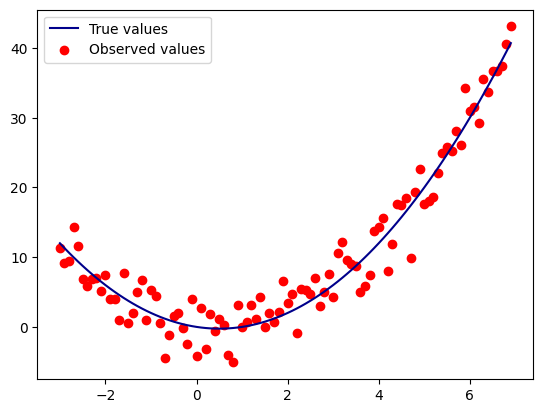

In [ ]:
ts=torch.arange(0,10,step=0.1)-3
true_values=torch.square(ts)-ts 
noisy_values=true_values+torch.normal(0,2.5,size=true_values.shape)
plt.plot(ts,true_values,c="darkblue",label="True values")
plt.scatter(ts,noisy_values,c="darkorange",label="Observed values")
plt.legend()
plt.show()

## Data preparation
Now that we have generated some data, we will prepare a dictionary to give to the model! It will include 
- "observation_times" of shape [B, wc, wlen, 1] describing the time of each observation (float)
- "observation_values" of shape [B, wc, wlen, 1] describing the value of each observation (float)
- "observation_mask" of shape [B, wc, wlen, 1] describing if a value was observed at that point in time (bool)
- "location_times" of shape [B, wlen_locs, 1] #TODO
- "linitial_conditions" of shape [B, D]
- "rinitial_conditions" of shape [B, D]